In [1]:
# Librerías

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import dask.dataframe as dd
import dtale

/home/juank/.local/lib/python3.10/site-packages/dask/dataframe/__init__.py:49: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


In [3]:
df = pd.read_csv('../dataset/Vehicle Fuel Economy Data.csv')

/tmp/ipykernel_20226/953586992.py:1: DtypeWarning:

Columns (73,75) have mixed types. Specify dtype option on import or set low_memory=False.



In [4]:
df.head(2)

,Year,Manufacturer,Model,barrels08,barrelsA08,charge240,city08,city08U,cityA08,cityA08U,...,mfrCode,c240Dscr,charge240b,c240bDscr,createdOn,modifiedOn,startStop,phevCity,phevHwy,phevComb
0,2017,BMW,M6 Coupe,17.500588,0.0,0.0,15.0,14.0,0.0,0.0,...,BMX,NaN,0.0,NaN,04-04-2016,09-09-2016,Y,0.0,0.0,0.0
1,2017,BMW,X3 sDrive28i,12.396250,0.0,0.0,21.0,21.0,0.0,0.0,...,BMX,NaN,0.0,NaN,04-04-2016,22-11-2016,Y,0.0,0.0,0.0


In [6]:
import sweetviz as sv

report = sv.analyze(df)
report.show_html('EDA.html')

Done! Use 'show' commands to display/save.   |██████████| [100%]   00:07 -> (00:00 left)


Report EDA.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [8]:
df.describe()  # Estadísticas descriptivas de las variables numéricas



,Year,barrels08,barrelsA08,charge240,city08,city08U,cityA08,cityA08U,cityCD,cityE,...,rangeHwyA,UCity,UCityA,UHighway,UHighwayA,youSaveSpend,charge240b,phevCity,phevHwy,phevComb
count,46186.000000,46169.000000,46169.000000,46169.000000,46169.000000,46169.000000,46169.000000,46169.000000,46169.000000,46169.000000,...,44192.000000,44192.000000,44192.000000,44192.000000,44192.000000,44192.000000,44170.000000,44170.000000,44170.000000,44170.000000
mean,2003.733079,15.306719,0.166865,0.114687,19.167493,7.965150,0.843618,0.701921,0.000238,0.701618,...,0.164464,24.554556,1.107372,35.704448,0.866718,-5093.925371,0.014150,0.283858,0.286710,0.283903
std,12.252017,4.343434,0.869974,1.012054,10.448985,14.226484,6.450475,6.316454,0.033236,5.649704,...,2.477254,15.141158,9.236931,13.782685,5.869861,4258.449576,0.296926,3.845646,3.723701,3.766720
min,1984.000000,0.047081,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,-37250.000000,0.000000,0.000000,0.000000,0.000000
25%,1992.000000,12.935217,0.000000,0.000000,15.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,18.749900,0.000000,28.300000,0.000000,-7750.000000,0.000000,0.000000,0.000000,0.000000
50%,2005.000000,14.875500,0.000000,0.000000,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,22.000000,0.000000,34.000000,0.000000,-4750.000000,0.000000,0.000000,0.000000,0.000000
75%,2015.000000,17.500588,0.000000,0.000000,21.000000,17.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,26.666700,0.000000,40.000000,0.000000,-2250.000000,0.000000,0.000000,0.000000,0.000000
max,2024.000000,42.501429,16.000000,19.000000,153.000000,153.000000,145.000000,145.000000,5.000000,122.000000,...,114.000000,224.800000,207.000000,187.100000,173.000000,7000.000000,9.000000,97.000000,81.000000,88.000000


In [9]:
df.info()  # Información sobre el DataFrame, como tipos de datos, memoria usage, etc.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46186 entries, 0 to 46185
Data columns (total 82 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Year             46186 non-null  int64  
 1   Manufacturer     46186 non-null  object 
 2   Model            46176 non-null  object 
 3   barrels08        46169 non-null  float64
 4   barrelsA08       46169 non-null  float64
 5   charge240        46169 non-null  float64
 6   city08           46169 non-null  float64
 7   city08U          46169 non-null  float64
 8   cityA08          46169 non-null  float64
 9   cityA08U         46169 non-null  float64
 10  cityCD           46169 non-null  float64
 11  cityE            46169 non-null  float64
 12  cityUF           46169 non-null  float64
 13  co2              46169 non-null  float64
 14  co2A             46169 non-null  float64
 15  co2TailpipeAGpm  46169 non-null  float64
 16  co2TailpipeGpm   46169 non-null  float64
 17  comb08      

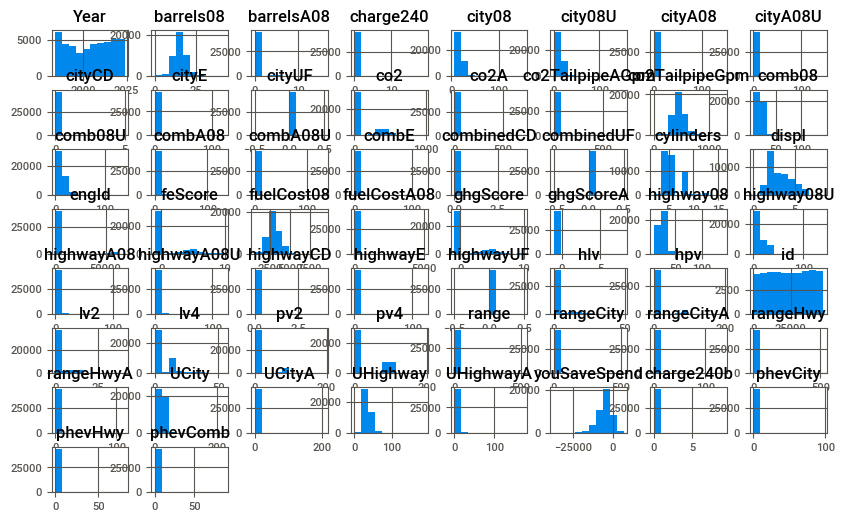

In [10]:
df.hist(figsize=(10, 6))
plt.show()


In [11]:
df.describe(include='all')


,Year,Manufacturer,Model,barrels08,barrelsA08,charge240,city08,city08U,cityA08,cityA08U,...,mfrCode,c240Dscr,charge240b,c240bDscr,createdOn,modifiedOn,startStop,phevCity,phevHwy,phevComb
count,46186.000000,46186,46176,46169.000000,46169.000000,46169.000000,46169.000000,46169.000000,46169.000000,46169.000000,...,15200,133,44170.000000,127,44170,44170,14357,44170.000000,44170.000000,44170.000000
unique,NaN,142,4783,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,51,5,NaN,7,440,280,2,NaN,NaN,NaN
top,NaN,Chevrolet,F150 Pickup 2WD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,GMX,standard charger,NaN,80 amp dual charger,01-01-2013,01-01-2013,N,NaN,NaN,NaN
freq,NaN,4341,233,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2108,122,NaN,55,32249,27410,7995,NaN,NaN,NaN
mean,2003.733079,NaN,NaN,15.306719,0.166865,0.114687,19.167493,7.965150,0.843618,0.701921,...,NaN,NaN,0.014150,NaN,NaN,NaN,NaN,0.283858,0.286710,0.283903
std,12.252017,NaN,NaN,4.343434,0.869974,1.012054,10.448985,14.226484,6.450475,6.316454,...,NaN,NaN,0.296926,NaN,NaN,NaN,NaN,3.845646,3.723701,3.766720
min,1984.000000,NaN,NaN,0.047081,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,...,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000
25%,1992.000000,NaN,NaN,12.935217,0.000000,0.000000,15.000000,0.000000,0.000000,0.000000,...,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000
50%,2005.000000,NaN,NaN,14.875500,0.000000,0.000000,18.000000,0.000000,0.000000,0.000000,...,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000
75%,2015.000000,NaN,NaN,17.500588,0.000000,0.000000,21.000000,17.000000,0.000000,0.000000,...,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000


In [16]:
df2=df.select_dtypes(include=['number'])
#media de cada variable numérica.
df2.median()



Year                2005.0000
barrels08             14.8755
barrelsA08             0.0000
charge240              0.0000
city08                18.0000
city08U                0.0000
cityA08                0.0000
cityA08U               0.0000
cityCD                 0.0000
cityE                  0.0000
cityUF                 0.0000
co2                   -1.0000
co2A                  -1.0000
co2TailpipeAGpm        0.0000
co2TailpipeGpm       444.3500
comb08                20.0000
comb08U                0.0000
combA08                0.0000
combA08U               0.0000
combE                  0.0000
combinedCD             0.0000
combinedUF             0.0000
cylinders              6.0000
displ                  3.0000
engId                164.0000
feScore               -1.0000
fuelCost08          2850.0000
fuelCostA08            0.0000
ghgScore              -1.0000
ghgScoreA             -1.0000
highway08             24.0000
highway08U             0.0000
highwayA08             0.0000
highwayA08

In [17]:
#mediana de cada variable numérica.
df2.median()


Year                2005.0000
barrels08             14.8755
barrelsA08             0.0000
charge240              0.0000
city08                18.0000
city08U                0.0000
cityA08                0.0000
cityA08U               0.0000
cityCD                 0.0000
cityE                  0.0000
cityUF                 0.0000
co2                   -1.0000
co2A                  -1.0000
co2TailpipeAGpm        0.0000
co2TailpipeGpm       444.3500
comb08                20.0000
comb08U                0.0000
combA08                0.0000
combA08U               0.0000
combE                  0.0000
combinedCD             0.0000
combinedUF             0.0000
cylinders              6.0000
displ                  3.0000
engId                164.0000
feScore               -1.0000
fuelCost08          2850.0000
fuelCostA08            0.0000
ghgScore              -1.0000
ghgScoreA             -1.0000
highway08             24.0000
highway08U             0.0000
highwayA08             0.0000
highwayA08

In [18]:
#moda de cada variable numérica.
df2.mode()


,Year,barrels08,barrelsA08,charge240,city08,city08U,cityA08,cityA08U,cityCD,cityE,...,rangeHwyA,UCity,UCityA,UHighway,UHighwayA,youSaveSpend,charge240b,phevCity,phevHwy,phevComb
0,1984.0,16.528333,0.0,0.0,15.0,0.0,0.0,0.0,0.0,0.0,...,0.0,20.0,0.0,32.0,0.0,-5250.0,0.0,0.0,0.0,0.0
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44187,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
44188,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
44189,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
44190,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [19]:
#varianza de cada variable numérica.
df2.var()


Year               1.501119e+02
barrels08          1.886542e+01
barrelsA08         7.568548e-01
charge240          1.024253e+00
city08             1.091813e+02
city08U            2.023928e+02
cityA08            4.160862e+01
cityA08U           3.989759e+01
cityCD             1.104604e-03
cityE              3.191915e+01
cityUF             0.000000e+00
co2                3.787400e+04
co2A               3.257792e+03
co2TailpipeAGpm    8.220324e+03
co2TailpipeGpm     1.655944e+04
comb08             9.790794e+01
comb08U            2.136522e+02
combA08            4.112818e+01
combA08U           3.882287e+01
combE              3.232917e+01
combinedCD         6.930908e-04
combinedUF         0.000000e+00
cylinders          3.138914e+00
displ              1.838697e+00
engId              2.714713e+08
feScore            9.101194e+00
fuelCost08         7.225102e+05
fuelCostA08        3.730297e+05
ghgScore           9.150200e+00
ghgScoreA          4.320479e-01
highway08          9.196694e+01
highway0

In [20]:
#desviación estándar de cada variable numérica.
df2.std()


Year                  12.252017
barrels08              4.343434
barrelsA08             0.869974
charge240              1.012054
city08                10.448985
city08U               14.226484
cityA08                6.450475
cityA08U               6.316454
cityCD                 0.033236
cityE                  5.649704
cityUF                 0.000000
co2                  194.612428
co2A                  57.077069
co2TailpipeAGpm       90.666005
co2TailpipeGpm       128.683468
comb08                 9.894844
comb08U               14.616847
combA08                6.413126
combA08U               6.230800
combE                  5.685874
combinedCD             0.026327
combinedUF             0.000000
cylinders              1.771698
displ                  1.355986
engId              16476.385230
feScore                3.016819
fuelCost08           850.006008
fuelCostA08          610.761565
ghgScore               3.024930
ghgScoreA              0.657303
highway08              9.589940
highway0

In [21]:
#rango (máximo - mínimo) de cada variable numérica
df2.max() - df2.min()


Year                  40.000000
barrels08             42.454348
barrelsA08            16.000000
charge240             19.000000
city08               147.000000
city08U              153.000000
cityA08              145.000000
cityA08U             145.000000
cityCD                 5.000000
cityE                122.000000
cityUF                 0.000000
co2                  980.000000
co2A                 714.000000
co2TailpipeAGpm      713.000000
co2TailpipeGpm      1269.571429
comb08               135.000000
comb08U              141.000000
combA08              133.000000
combA08U             133.000000
combE                121.000000
combinedCD             4.000000
combinedUF             0.000000
cylinders             14.000000
displ                  8.400000
engId              69102.000000
feScore               11.000000
fuelCost08          8850.000000
fuelCostA08         5000.000000
ghgScore              11.000000
ghgScoreA              9.000000
highway08            131.000000
highway0

In [22]:
#simetría de la distribución de cada variable numérica
df2.skew()


Year                -0.091011
barrels08            0.150828
barrelsA08           5.472431
charge240           10.060657
city08               6.879975
city08U              3.939306
cityA08             12.728400
cityA08U            13.435223
cityCD             148.073794
cityE                9.122636
cityUF               0.000000
co2                  1.167883
co2A                 8.520871
co2TailpipeAGpm      5.499780
co2TailpipeGpm       0.188467
comb08               6.094390
comb08U              3.057496
combA08             11.648493
combA08U            12.507375
combE                8.863400
combinedCD         151.930905
combinedUF           0.000000
cylinders            0.917188
displ                0.676899
engId                2.413109
feScore              1.233362
fuelCost08           0.616664
fuelCostA08          5.403032
ghgScore             1.246123
ghgScoreA            8.720137
highway08            4.775007
highway08U           2.078198
highwayA08          10.132416
highwayA08

In [26]:
#Análisis de variables categóricas
df3=df.select_dtypes(include=['object'])

df3.describe(include='all')

,Manufacturer,Model,drive,eng_dscr,fuelType,fuelType1,VClass,mpgData,phevBlended,trany,...,atvType,fuelType2,rangeA,evMotor,mfrCode,c240Dscr,c240bDscr,createdOn,modifiedOn,startStop
count,46186,46176,44983,29092,44953,44953,44953,44179,44192,44181,...,4386,1647,1642,1874,15200,133,127,44170,44170,14357
unique,142,4783,7,576,14,6,31,2,2,40,...,8,4,229,294,51,5,7,440,280,2
top,Chevrolet,F150 Pickup 2WD,Front-Wheel Drive,(FFS),Regular,Regular Gasoline,Compact Cars,N,False,Automatic 4-spd,...,FFV,E85,290,48V Li-Ion,GMX,standard charger,80 amp dual charger,01-01-2013,01-01-2013,N
freq,4341,233,15267,8827,27985,29488,6031,30408,43955,10149,...,1327,1327,74,257,2108,122,55,32249,27410,7995


In [32]:
# Valores únicos de cada variable categórica
valores_unicos = df3.apply(lambda x: x.unique())

with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(valores_unicos)

Manufacturer    [BMW, Infiniti, MINI, Kia, Ford, GMC, Lincoln,...
Model           [M6 Coupe, X3 sDrive28i, Q50S Red Sport, John ...
drive           [Rear-Wheel Drive, Front-Wheel Drive, All-Whee...
eng_dscr        [SIDI, (305)      (FFS), SIDI; Stop-Start, nan...
fuelType        [Premium, Regular, Diesel, Electricity, Gasoli...
fuelType1       [Premium Gasoline, Regular Gasoline, Diesel, E...
VClass          [Subcompact Cars, Small Sport Utility Vehicle ...
mpgData                                               [N, Y, nan]
phevBlended                                    [False, True, nan]
trany           [Manual 6-spd, Automatic (S8), Automatic (S7),...
guzzler                                            [G, nan, T, S]
trans_dscr      [nan, Creeper, SIL, 2MODE 2LKUP, 2MODE, CLKUP,...
tCharger                                                 [T, nan]
sCharger                                                 [nan, S]
atvType         [nan, Hybrid, Diesel, EV, FFV, Plug-in Hybrid,...
fuelType2 

In [33]:
# Ajusta la configuración de pandas para mostrar listas completas
pd.set_option('display.max_seq_items', None)

# Itera sobre cada columna e imprime sus valores únicos
for columna in df3.columns:
    print(f"Valores únicos en '{columna}': {df3[columna].unique()}")


Valores únicos en 'Manufacturer': ['BMW' 'Infiniti' 'MINI' 'Kia' 'Ford' 'GMC' 'Lincoln' 'Maserati' 'Porsche'
 'Tesla' 'Subaru' 'Hyundai' 'Mercedes-Benz' 'Volkswagen' 'Lamborghini'
 'Toyota' 'Rolls-Royce' 'Jaguar' 'Chevrolet' 'Mazda' 'Genesis' 'Nissan'
 'Volvo' 'Cadillac' 'Acura' 'Honda' 'Land Rover' 'Audi' 'Ferrari' 'Jeep'
 'Fiat' 'Dodge' 'Bentley' 'Lexus' 'Chrysler' 'Saab' 'Mitsubishi' 'smart'
 'Roush Performance' 'Mobility Ventures LLC' 'Alfa Romeo' 'Ram' 'Buick'
 'Pagani' 'Aston Martin' 'Suzuki' 'McLaren Automotive' 'Aurora Cars Ltd'
 'RUF Automobile' 'Lotus' 'Pontiac' 'Ruf Automobile Gmbh' 'Bugatti'
 'Isuzu' 'Plymouth' 'Polestar' 'Sterling' 'Mercury' 'Rivian' 'Lucid'
 'Oldsmobile' 'Peugeot' 'AM General' 'American Motors Corporation'
 'Saturn' 'Volga Associated Automobile' 'Geo' 'Wallace Environmental'
 'Import Trade Services' 'J.K. Motors' 'Autokraft Limited' 'CX Automotive'
 'Panos' 'Red Shift Ltd.' 'Excalibur Autos' 'Maybach' 'Scion'
 'Bitter Gmbh and Co. Kg' 'Azure Dynamics' 'CO

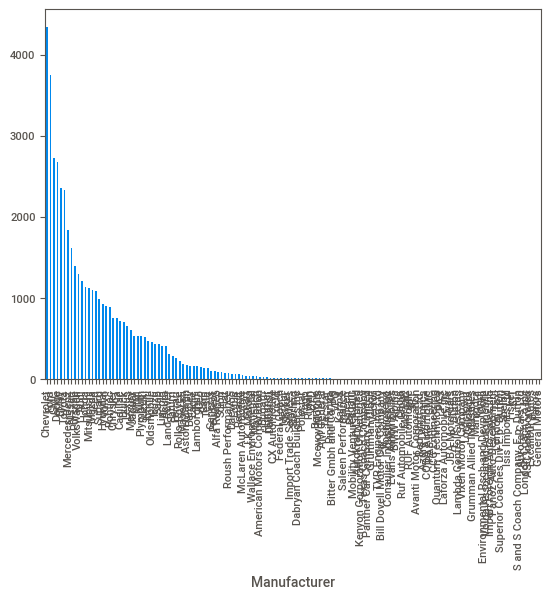

In [28]:
df3['Manufacturer'].value_counts().plot(kind='bar')
plt.show()


Relación de Columnas:

Contaminación del Aire:

	 Estos campos están relacionados con las emisiones de dióxido de carbono (CO2) del vehículo, lo cual es un indicador directo de la contaminación del aire.	
	 	co2, co2A, co2TailpipeAGpm, co2TailpipeGpm, ghgScore, ghgScoreA
	 
    	 Puntuación de eficiencia de combustible, que también puede relacionarse con la cantidad de emisiones contaminantes.
    	 	feScore
    	
Capacidad de Carga Total Eléctrica:

	capacidad de carga utilizando un cargador de 240V.
		charge240, charge240b
	
	Descripciones relacionadas con la carga a 240V.
		c240Dscr, c240bDscr
		
	Información sobre el motor eléctrico del vehículo.
		evMotor
		
	Información sobre vehículos eléctricos híbridos enchufables (PHEV) que pueden funcionar en modo combinado
		phevBlended
		
Rendimiento de Distancia Recorrida por Unidad de Combustible

	Consumo de barriles de petróleo por año, lo cual puede usarse para calcular la distancia recorrida por unidad de combustible
		barrels08, barrelsA08
	
	Eficiencia de combustible en ciudad, en carretera y combinada, tanto para gasolina regular como para otras variantes de combustible
		city08, city08U, cityA08, cityA08U, comb08, comb08U, combA08, combA08U, highway08, highway08U, highwayA08, highwayA08U
		
	Datos de millas por galón (millas recorridas por unidad de combustible)
		mpgData
		
Valor del Vehículo
	
	Costos estimados de combustible, que pueden influir en el valor total de propiedad del vehículo.
		fuelCost08, fuelCostA08
		
	Ahorros o gastos comparados con un vehículo promedio, lo cual puede influir en el valor percibido del vehículo.
		youSaveSpend
		
	Clase del vehículo, que puede afectar su valor en el mercado
		VClass
		
Para determinar si un vehículo es eléctrico, convencional o híbrido:
	
	Estas columnas especifican el tipo de combustible utilizado por el vehículo, lo cual es crucial para identificar si un vehículo es eléctrico, híbrido o convencional.
    		fuelType, fuelType1, fuelType2 
    		
    	Indica si el vehículo es un híbrido enchufable (PHEV) que puede funcionar en modo combinado.
	    phevBlended
	   
	Información sobre el motor eléctrico del vehículo, lo cual indica que el vehículo es eléctrico.
    		evMotor
    		
    	Datos específicos de vehículos híbridos enchufables, indicando eficiencia en ciudad, carretera y combinada.
	    phevCity, phevHwy, phevComb